In [43]:
import pandas as pd
import os

In [50]:
def rvid_pairs_to_complex_fasta(row, df_rvid_to_seq):
    rvid_1 = row['Rv_ID_1']
    rvid_2 = row['Rv_ID_2']
    try:
        seq_1 = df_rvid_to_seq[df_rvid_to_seq['Gene Names'].str.contains(rvid_1)].Sequence.values[0]
        seq_2 = df_rvid_to_seq[df_rvid_to_seq['Gene Names'].str.contains(rvid_2)].Sequence.values[0]    
        seq_complex = seq_1 + ':' + seq_2

    except:
        seq_complex = 'FIX_MANUALLY'
    
    return seq_complex

### Load file with RvID-to-sequence mapping: 

In [51]:
fn_in = '../data/annotations/uniprot_mtb_092022.tsv'
df_rvid_to_seq = pd.read_csv(fn_in, sep = '\t')
df_rvid_to_seq['Gene Names'] = df_rvid_to_seq['Gene Names'].fillna('')
df_rvid_to_seq.head(2)

,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Annotation
0,A0A089QRB9,MSL3_MYCTU,Mycolipanoate synthase (EC 2.3.1.252) (Mycocer...,msl3 pks3 pks4 Rv1180/Rv1181,Mycobacterium tuberculosis (strain ATCC 25618 ...,2085,MRTATATSVAVIGMACRLPGGIDSPQRLWEALLRGDDLVGEIPADR...,5.0
1,I6WXK4,PTPB_MYCTU,Triple specificity protein phosphatase PtpB (E...,ptpB mptpB Rv0153c,Mycobacterium tuberculosis (strain ATCC 25618 ...,276,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,5.0


### Load pairs of interacting candidates:

##### Batches run so far: 
* ../data/AF_TnSeq_complex_keep_042822_300.xlsx

In [82]:
fn = '../data/AF_TnSeq_complex_keep_042822_900.xlsx'
df_pair = pd.read_excel(fn)
df_pair.head(2)

,Rv_ID_1,Rv_ID_2
0,Rv2379c,Rv2383c
1,Rv2572c,Rv3029c


In [83]:
df_pair['seq_complex'] = df_pair.apply(rvid_pairs_to_complex_fasta, axis=1, args=[df_rvid_to_seq])
df_pair['len_seq_complex'] = [len(seq) for seq in df_pair.seq_complex]

Size threshold cut-off: 

In [84]:
th = 800
df_pair_th = df_pair[df_pair.len_seq_complex<=th].copy()
df_pair_th.sort_values(by = 'len_seq_complex', inplace=True)

In [85]:
df_pair_th.shape

(46, 4)

<AxesSubplot:>

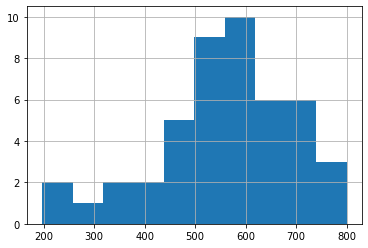

In [86]:
df_pair_th.len_seq_complex.hist()

Write to individual .fasta files

In [87]:
path_out = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/data/GLS_TnSeq_v2/AF_pairs/PENDING'
for index, row in df_pair_th.iterrows():
    header = '>>'+row.Rv_ID_1 + '_and_' + row.Rv_ID_2
    fn_name = row.Rv_ID_1 + '_and_' + row.Rv_ID_2 + '.fasta'
    seq = row.seq_complex
    fn_out = os.path.join(path_out, fn_name)
    with open(fn_out, 'w') as fout:
        fout.write(header + '\n')
        fout.write(seq+'\n')  